In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
marketing=pd.read_csv('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/marketing_campaign5.csv',sep='\t')
marketing.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [279]:
marketing.shape

(2240, 29)

In [280]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [281]:
catcols=[]
for col in marketing.columns:
    if marketing[col].dtype=='O':
        catcols.append(col)
print(catcols,len(catcols))

['Education', 'Marital_Status', 'Dt_Customer'] 3


In [282]:
numcols=[]
for col in marketing.columns:
    if marketing[col].dtype !='O':
        numcols.append(col)
print(numcols,len(numcols))

['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'] 26


## Univariate analysis

## EDA ON CAT COLUMNS

In [283]:
marketing['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

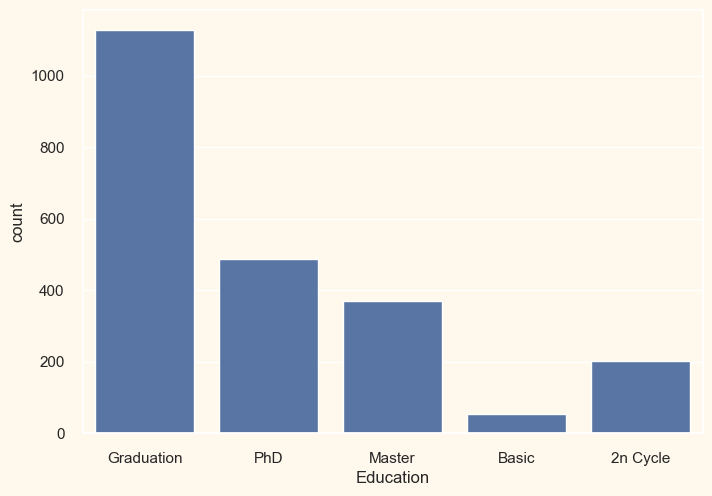

In [284]:
sns.countplot(x='Education',data=marketing)
plt.show()

In [285]:
marketing['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [286]:
marketing['Marital_Status']=marketing['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

In [287]:
marketing['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64

In [288]:
sns.countplot(x='Marital_Status',data=marketing)
plt.show()

In [289]:
marketing['Dt_Customer'].nunique()

663

In [290]:
from datetime import datetime
newdates=[]
for date in marketing['Dt_Customer']:
    realdate=datetime.strptime(date,'%d-%m-%Y')
    newdate=realdate.strftime('%m %d %y')
    newdates.append(newdate)
marketing['newdate']=newdates

In [291]:
marketing['Dt_Customer']=marketing['newdate']

In [292]:
marketing['Dt_Customer']=pd.to_datetime(marketing['Dt_Customer'])

In [293]:
marketing['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [294]:
marketing['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [295]:
marketing['Dt_Customer'].value_counts()

Dt_Customer
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: count, Length: 663, dtype: int64

In [296]:
#Observations:
#1.convert every date into m d y using strptime and strftime from datetime module
#2.convert dtype to datetime to find min , max and other functions
#3.we see it has 2 years of data from 2012/07 to 2014/06

## EDA on NUM COLUMNS

In [297]:
marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
newdate                 0
dtype: int64

In [298]:
marketing['Income'].unique()

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [299]:
marketing['Income']=marketing['Income'].replace(np.nan,'unknown')

In [300]:
marketing['Income']=marketing['Income'].replace('unknown',0)

In [301]:
marketing['Income'].isnull().sum()

0

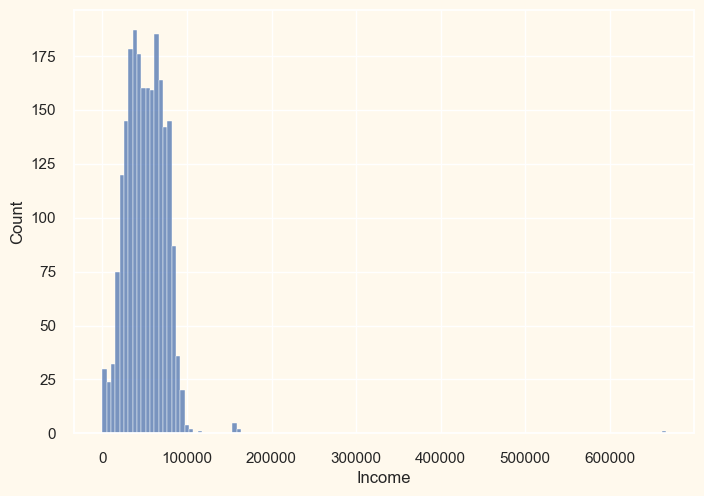

In [302]:
sns.histplot(x='Income',data=marketing)
plt.show()

In [303]:
marketing=marketing[marketing['Income']<=600000]

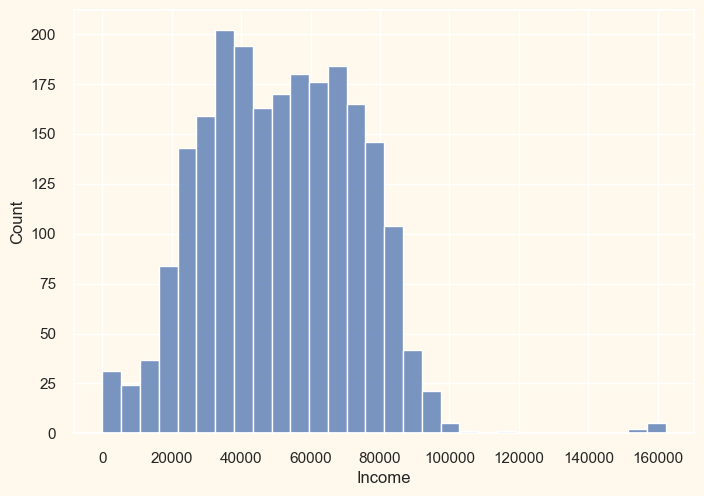

In [304]:
sns.histplot(x='Income',bins=30,data=marketing)
plt.show()

In [305]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [306]:
marketing['Income']=marketing['Income'].astype('int64')

In [307]:
marketing.drop(columns=['ID'],inplace=True)

In [308]:
marketing['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940], dtype=int64)

In [309]:
marketing['Year_Birth'].nunique()

59

In [310]:
marketing['Year_Birth'].max()-marketing['Year_Birth'].min()

103

In [311]:
current_year = datetime.now().year
marketing['Age']=current_year - marketing['Year_Birth']

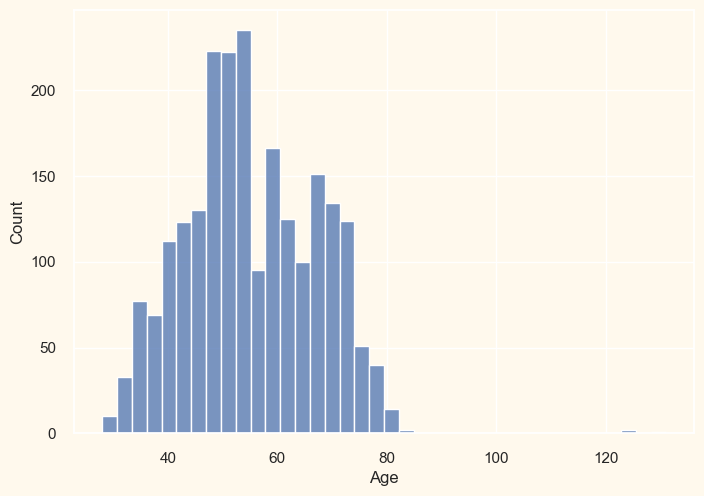

In [312]:
sns.histplot(x='Age',data=marketing)
plt.show()

In [313]:
marketing=marketing[marketing['Age']<=100]

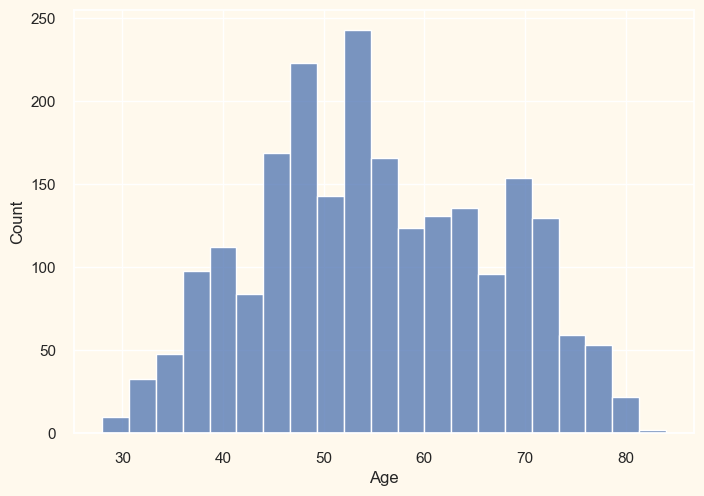

In [314]:
sns.histplot(x='Age',data=marketing)
plt.show()

In [315]:
marketing['Age'].max()-marketing['Age'].min()

56

In [316]:
marketing['Age'].max()

84

In [317]:
marketing['Age'].min()

28

In [318]:
marketing['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

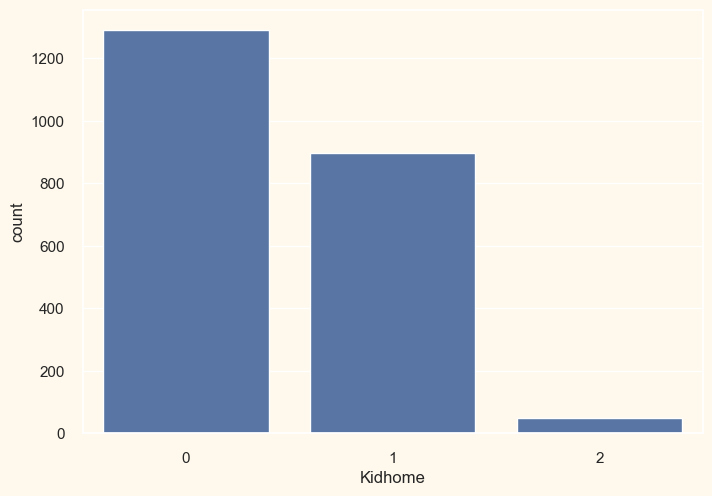

In [319]:
sns.countplot(x='Kidhome',data=marketing)
plt.show()

In [320]:
marketing['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

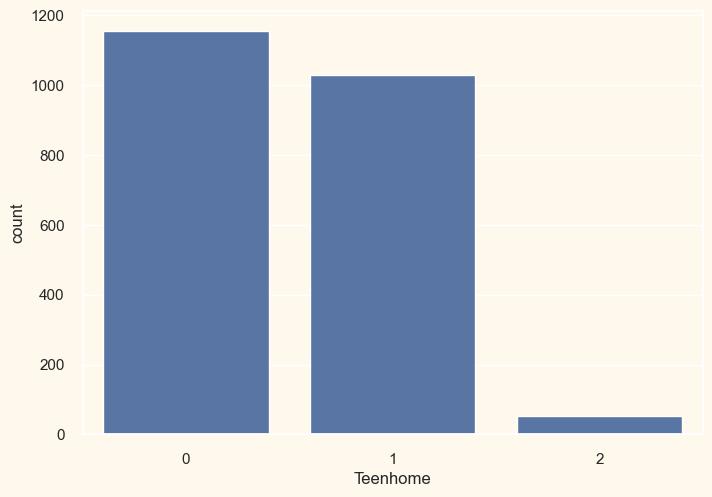

In [321]:
sns.countplot(x='Teenhome',data=marketing)
plt.show()

In [322]:
marketing['Dt_Customer']=pd.to_datetime(marketing['Dt_Customer'])
marketing['age_enrolled']=marketing['Dt_Customer'].dt.year-marketing['Year_Birth']

In [323]:
marketing['age_enrolled']

0       55
1       60
2       48
3       30
4       33
        ..
2235    46
2236    68
2237    33
2238    58
2239    58
Name: age_enrolled, Length: 2236, dtype: int64

In [324]:
marketing['age_enrolled'].min()

16

In [325]:
marketing['age_enrolled'].max()

73

In [326]:
marketing['age_enrolled'].value_counts().head(10)

age_enrolled
41    91
42    89
38    88
37    82
43    71
44    69
40    69
35    67
36    62
48    61
Name: count, dtype: int64

In [327]:
#OBS
#people within age range 35 to 48 have more starting enrollment with company
#data dates back to 12 years ago
#mini age of enroll was 16 ,now aged 28
#maxi age was 73 ,now aged 84

In [328]:
marketing['Recency'].unique()

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91,
       86, 41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3,
       88, 80, 72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 25,
       40,  9, 87,  5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27,
       74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77,
       81, 14, 52, 93, 50, 60, 66, 97, 62,  6, 33, 67, 22, 71,  7],
      dtype=int64)

In [329]:
marketing['Recency'].value_counts()

Recency
56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: count, Length: 100, dtype: int64

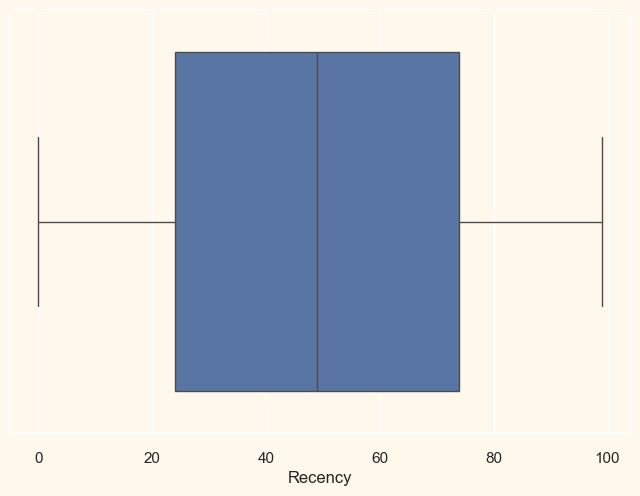

In [330]:
sns.boxplot(x='Recency',data=marketing)
plt.show()

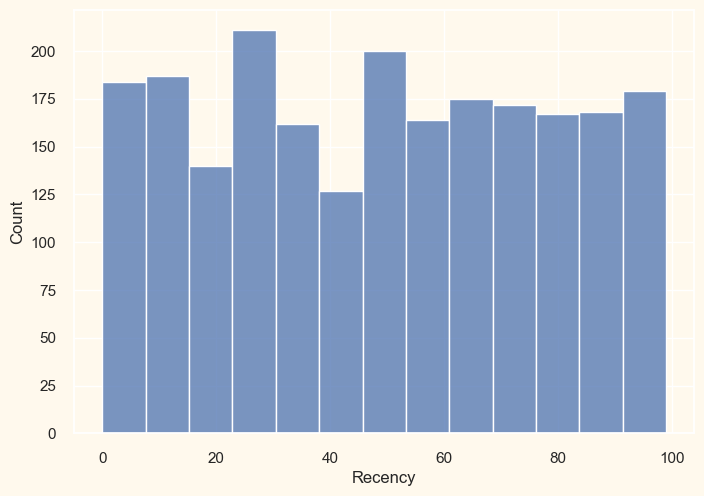

In [331]:
sns.histplot(x='Recency',data=marketing)
plt.show()

In [332]:
#OBS
#its a 2 year data , the most freq is around 50 and 30, ranging from 0 to 100
# a year has 52 weeks, from this customer visit 2 week once.or 3 to 4 week once

In [333]:
products=marketing[['MntWines',          
  'MntFruits',          
  'MntMeatProducts',     
  'MntFishProducts',        
  'MntSweetProducts',     
  'MntGoldProds']]

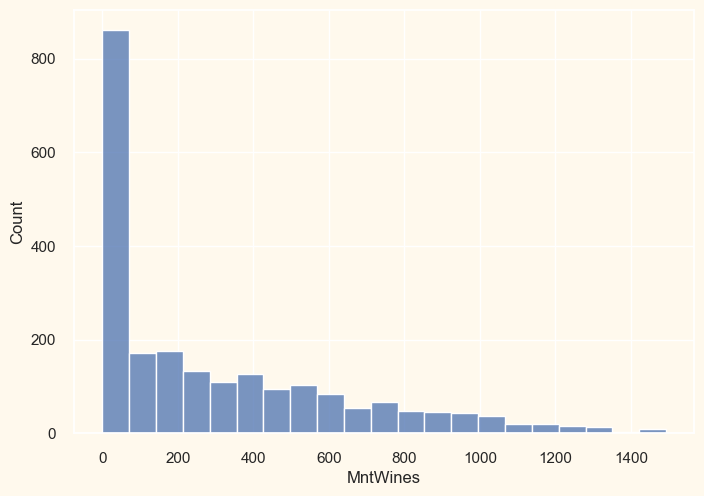

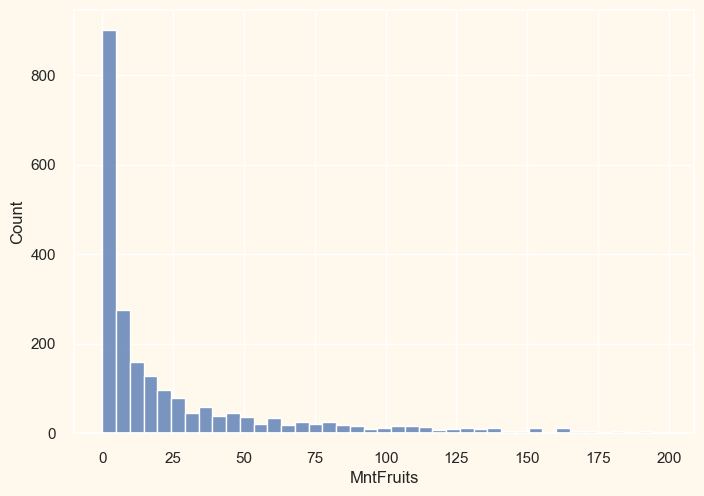

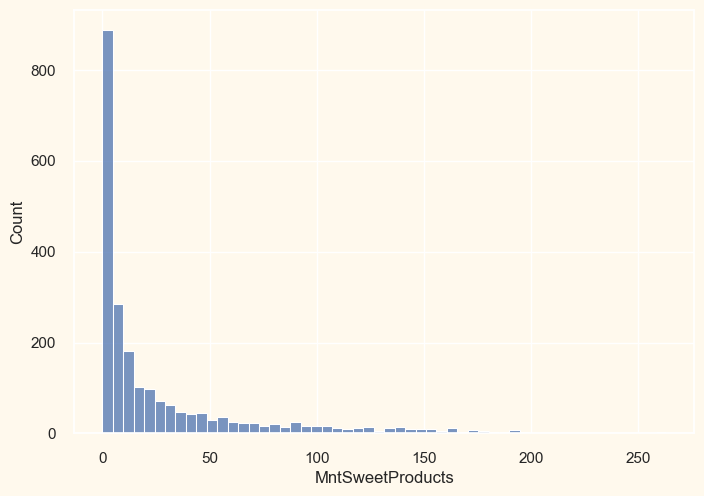

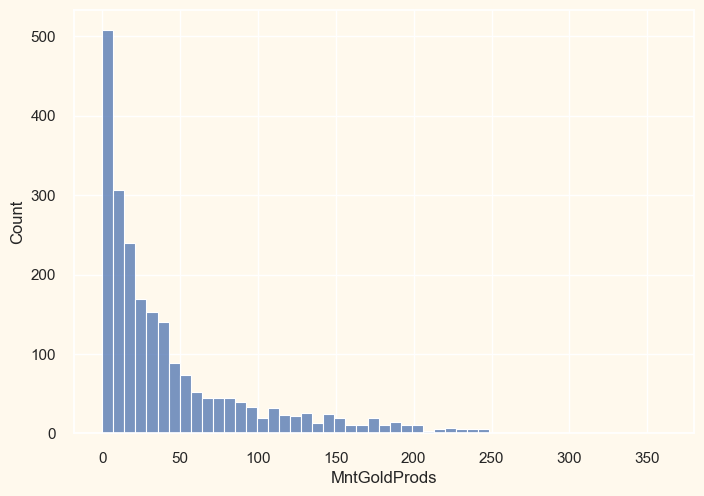

In [334]:
for prod in products:
    sns.histplot(x=prod,data=marketing)
    plt.show()

In [335]:
#wines and meat are costly #fruits and fish are pretty cheap 

In [336]:
purchases=marketing[['NumDealsPurchases',   
'NumWebPurchases',      
'NumCatalogPurchases',    
'NumStorePurchases',      
'NumWebVisitsMonth']]

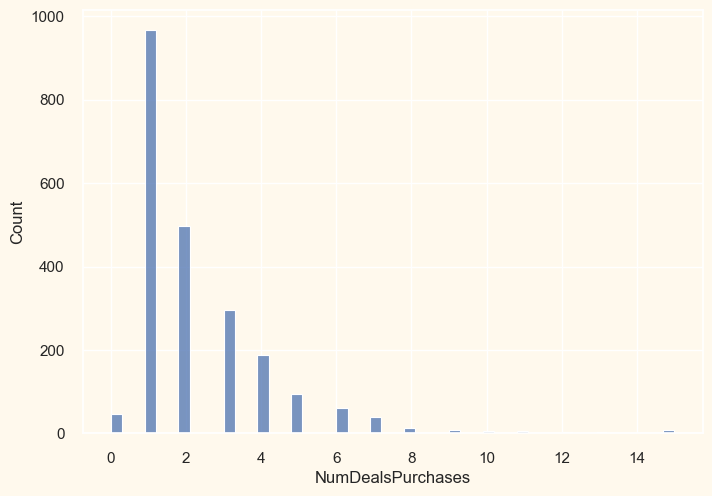

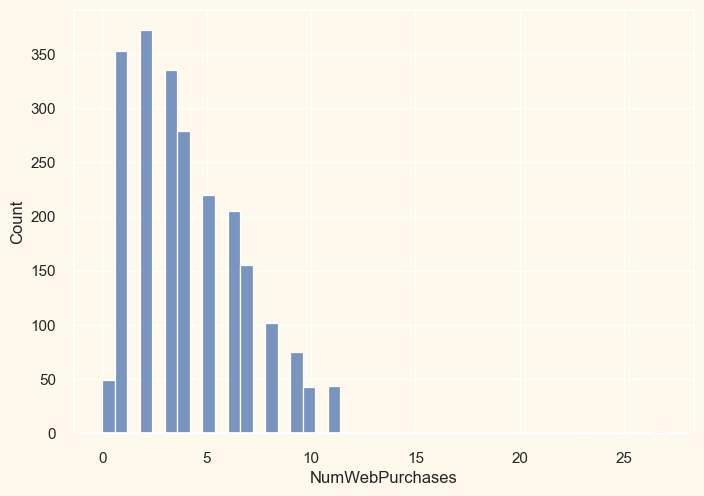

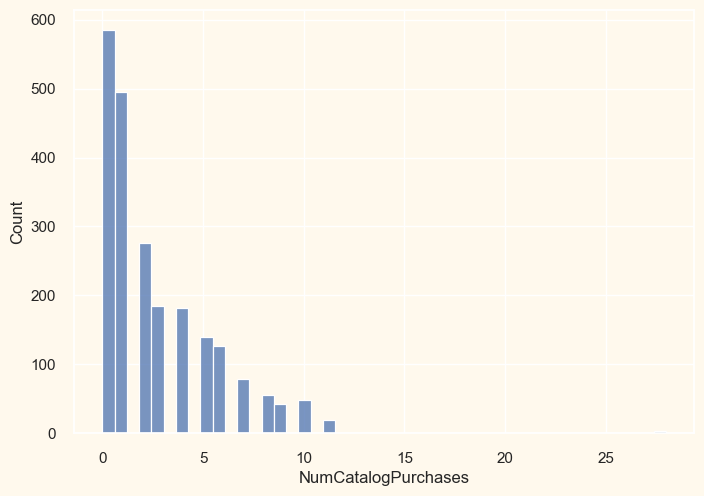

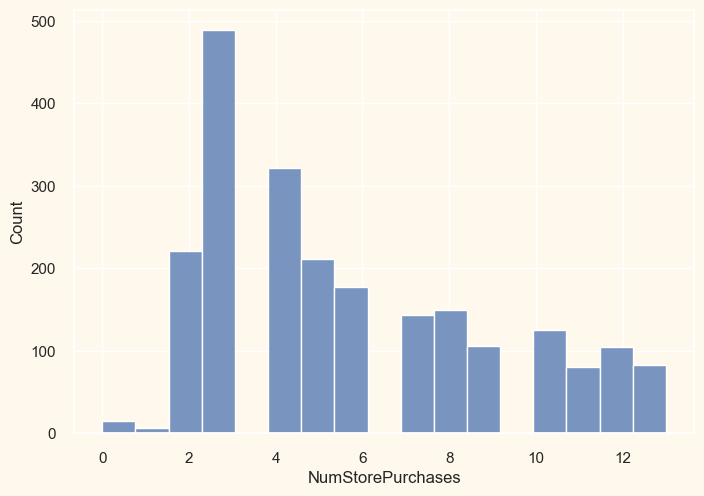

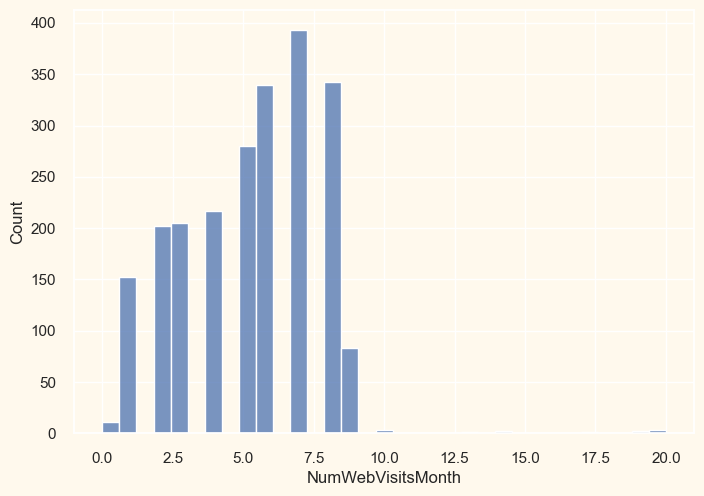

In [337]:
for purchase in purchases:
    sns.histplot(x=purchase,data=marketing)
    plt.show()

In [338]:
campaigns=marketing[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']]

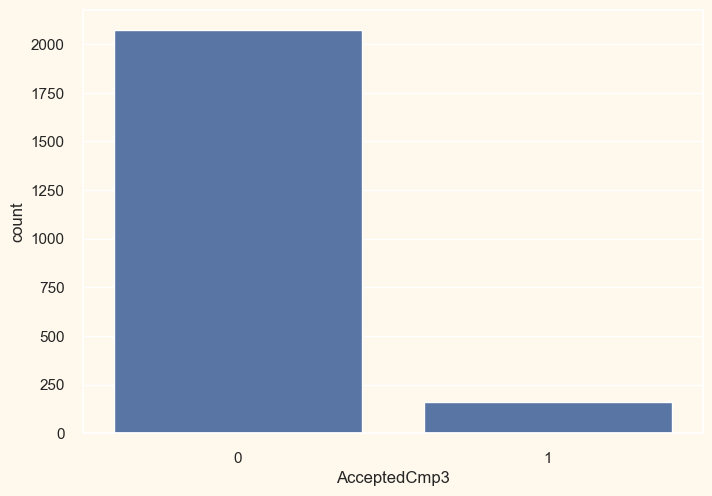

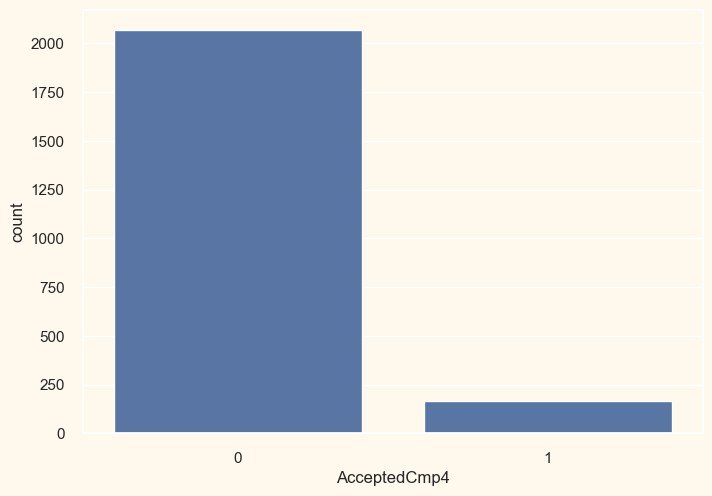

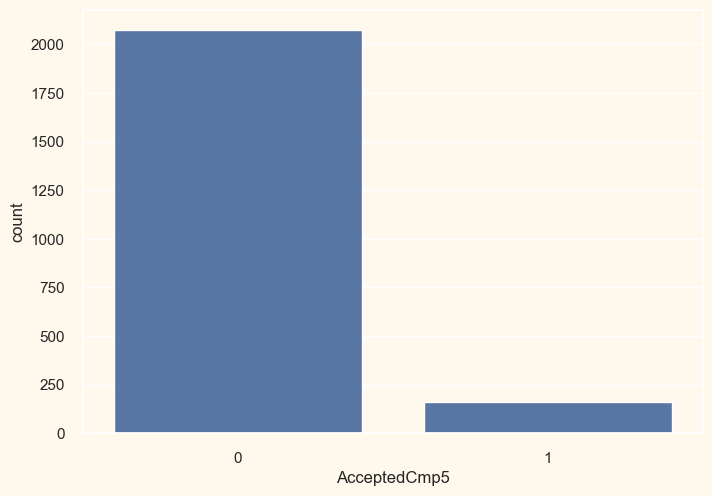

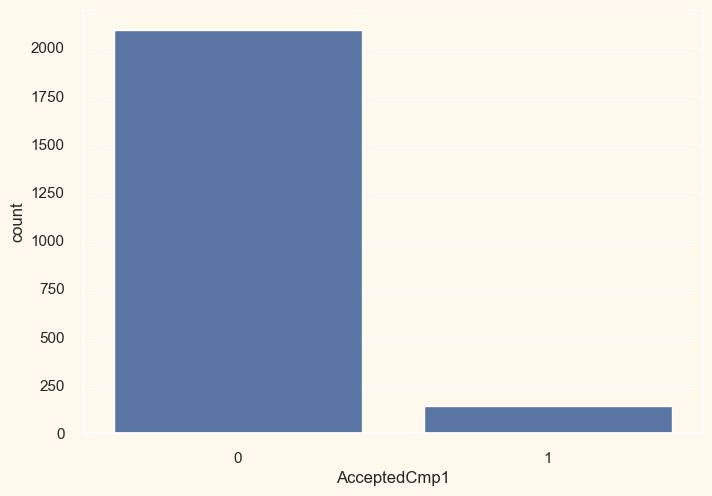

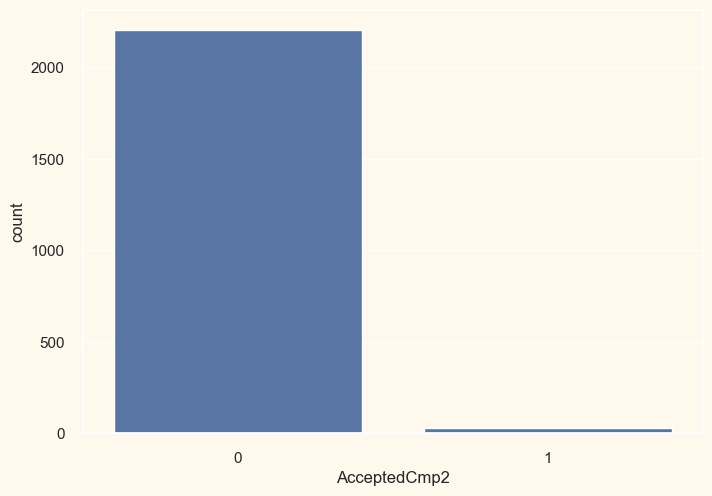

In [339]:
for camp in campaigns:
    sns.countplot(x=camp,data=marketing)
    plt.show()

In [340]:
marketing['AcceptedCmp1'].value_counts()

AcceptedCmp1
0    2092
1     144
Name: count, dtype: int64

In [341]:
marketing['AcceptedCmp2'].value_counts()

AcceptedCmp2
0    2206
1      30
Name: count, dtype: int64

In [342]:
marketing['AcceptedCmp3'].value_counts()

AcceptedCmp3
0    2073
1     163
Name: count, dtype: int64

In [343]:
marketing['AcceptedCmp4'].value_counts()

AcceptedCmp4
0    2069
1     167
Name: count, dtype: int64

In [344]:
marketing['AcceptedCmp5'].value_counts()

AcceptedCmp5
0    2074
1     162
Name: count, dtype: int64

In [345]:
marketing['Response'].value_counts()

Response
0    1902
1     334
Name: count, dtype: int64

In [346]:
#OBS
#campaign 2 is worst
#campaign 3,4 5 performed the same
# the last response campaign is the best

In [347]:
marketing['Complain'].value_counts()  #lesser complain in last two years so it sud be a gud shop

Complain
0    2216
1      20
Name: count, dtype: int64

In [348]:
marketing['Z_CostContact'].unique()

array([3], dtype=int64)

In [349]:
marketing['Z_CostContact'].nunique()

1

In [350]:
marketing['Z_CostContact']

0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Z_CostContact, Length: 2236, dtype: int64

In [351]:
marketing['Z_Revenue'].value_counts()

Z_Revenue
11    2236
Name: count, dtype: int64

In [352]:
marketing.drop(columns=['Z_Revenue','Z_CostContact'],inplace=True)

In [353]:
marketing.drop(columns=['newdate'],inplace=True)

In [354]:
marketing.head()

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0        1957  Graduation         Single   58138        0         0   
1        1954  Graduation         Single   46344        1         1   
2        1965  Graduation       Together   71613        0         0   
3        1984  Graduation       Together   26646        1         0   
4        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0  2012-09-04       58       635         88  ...                  7   
1  2014-03-08       38        11          1  ...                  5   
2  2013-08-21       26       426         49  ...                  4   
3  2014-02-10       26        11          4  ...                  6   
4  2014-01-19       94       173         43  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  Age  age_enrolled  
0         0         1   67            55  
1         0         0   70            60  
2         0         0   59            48  
3         0         0   40            30  
4         0         0   43            33  

[5 rows x 28 columns]

In [355]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2236 non-null   int64         
 1   Education            2236 non-null   object        
 2   Marital_Status       2236 non-null   object        
 3   Income               2236 non-null   int64         
 4   Kidhome              2236 non-null   int64         
 5   Teenhome             2236 non-null   int64         
 6   Dt_Customer          2236 non-null   datetime64[ns]
 7   Recency              2236 non-null   int64         
 8   MntWines             2236 non-null   int64         
 9   MntFruits            2236 non-null   int64         
 10  MntMeatProducts      2236 non-null   int64         
 11  MntFishProducts      2236 non-null   int64         
 12  MntSweetProducts     2236 non-null   int64         
 13  MntGoldProds         2236 non-null   i

## Bivariate Analysis

In [356]:

import matplotlib.pyplot as plt
fig ,ax = plt.subplots(1,3,figsize=(10, 3))
 
sns.boxplot(x='Marital_Status', y='Age', data=marketing, ax=ax[0])
ax[0].set_title("Age Vs Marital Status")
ax[0].set_xlabel("Marital Status")
ax[0].set_ylabel("Age")
ax[0].tick_params(rotation=45)

sns.boxplot(x='Education', y='Age', data=marketing, ax=ax[1])
ax[1].set_title("Age Vs Education")
ax[1].set_xlabel("Education")
ax[1].set_ylabel("Age")
ax[1].tick_params(rotation=45)

sns.scatterplot(x='Income', y='Age', hue='Education', data=marketing, ax=ax[2])
ax[2].set_title("Age Vs Income")
ax[2].set_xlabel("Income")
ax[2].set_ylabel("Age")
plt.show()



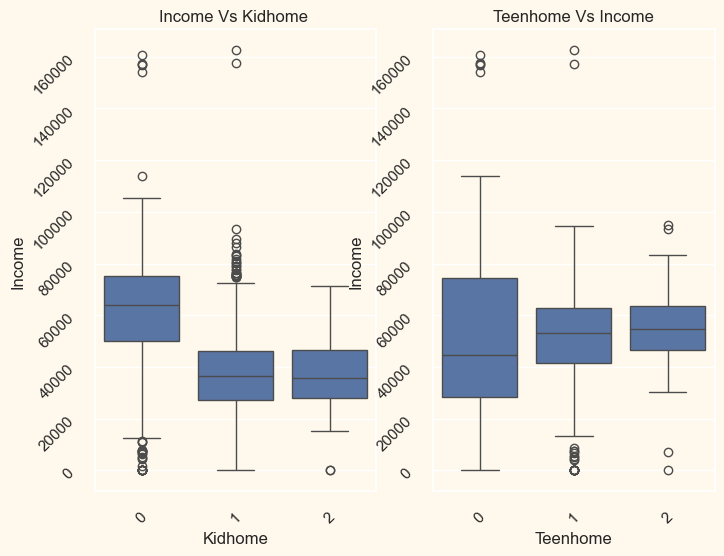

In [357]:
fig ,ax = plt.subplots(1,2,figsize=(8, 6))
 
sns.boxplot(x='Kidhome', y='Income', data=marketing, ax=ax[0])
ax[0].set_title("Income Vs Kidhome ")
ax[0].set_xlabel("Kidhome")
ax[0].set_ylabel("Income")
ax[0].tick_params(rotation=45)

sns.boxplot(x='Teenhome', y='Income', data=marketing, ax=ax[1])
ax[1].set_title("Teenhome Vs Income")
ax[1].set_xlabel("Teenhome")
ax[1].set_ylabel("Income")
ax[1].tick_params(rotation=45)

In [358]:
#OBS
#people with zero kids have high income
#people with 2 kids have a base abv 20000,but high is only 80000

#zero teen has high variablity in income
#2 has more avg base but not very high income

In [359]:
marketing['Totalkids']=marketing['Kidhome']+marketing['Teenhome']

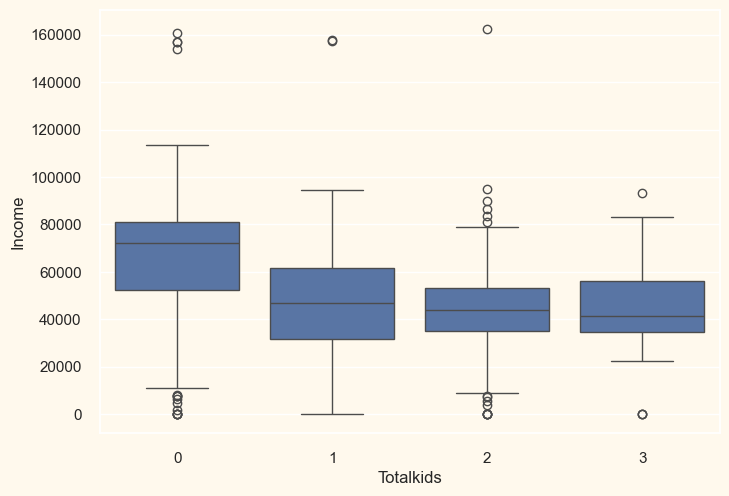

In [360]:
sns.boxplot(x='Totalkids', y='Income', data=marketing)
plt.show()

In [361]:
#those who have 3 kids have high starting income,but not too much income
#those with 0,has high incomes


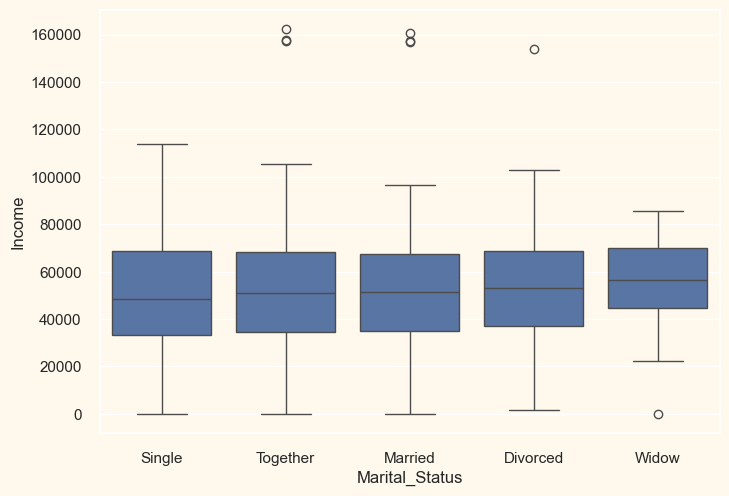

In [362]:
sns.boxplot(x='Marital_Status', y='Income', data=marketing)
plt.show()

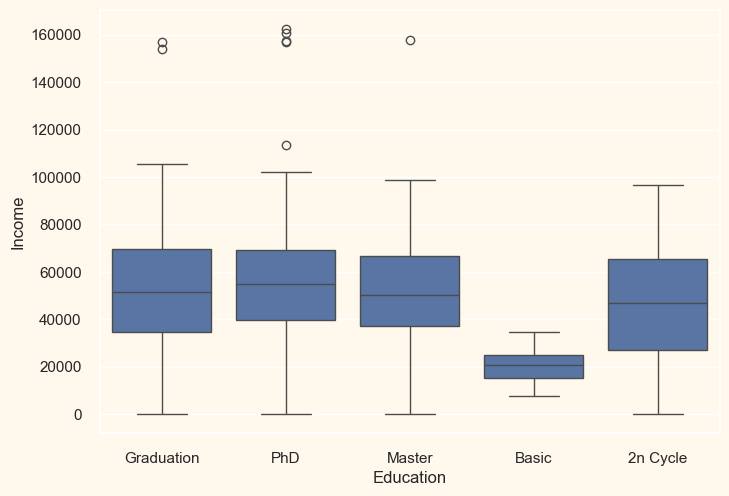

In [363]:
sns.boxplot(x='Education', y='Income', data=marketing)
plt.show()

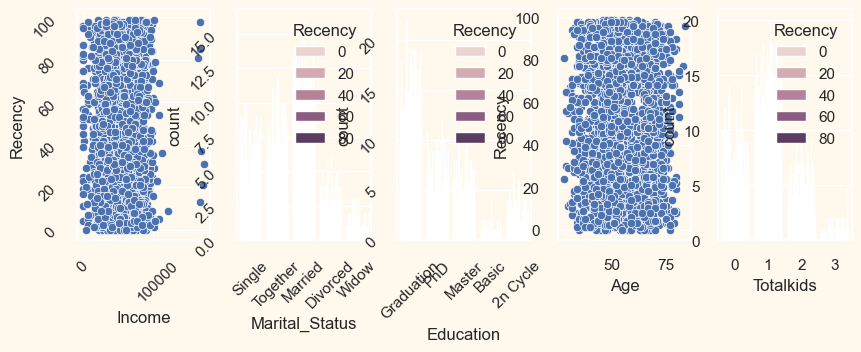

In [364]:
fig,ax= plt.subplots(1,5,figsize=(10,3))
sns.scatterplot(x='Income', y='Recency', data=marketing,ax=ax[0])
sns.countplot(x='Marital_Status', hue='Recency', data=marketing,ax=ax[1])
sns.countplot(x='Education', hue='Recency', data=marketing,ax=ax[2])
sns.scatterplot(x='Age', y='Recency', data=marketing,ax=ax[3])
sns.countplot(x='Totalkids', hue='Recency', data=marketing,ax=ax[4])
ax[0].tick_params(rotation=45)
ax[1].tick_params(rotation=45)
ax[2].tick_params(rotation=45)
plt.show()

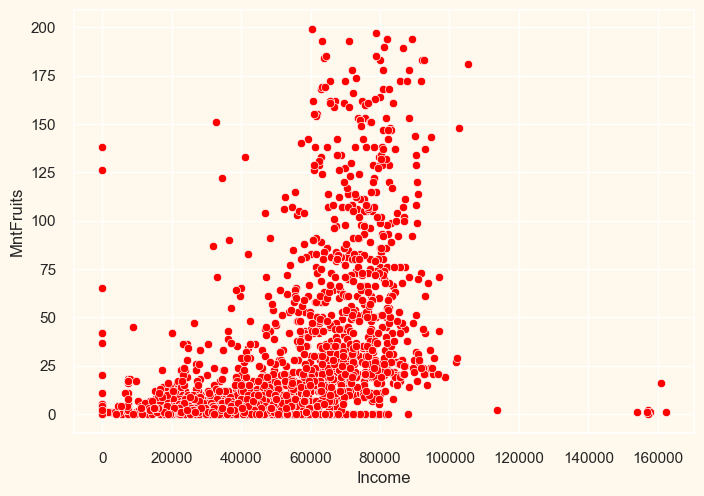

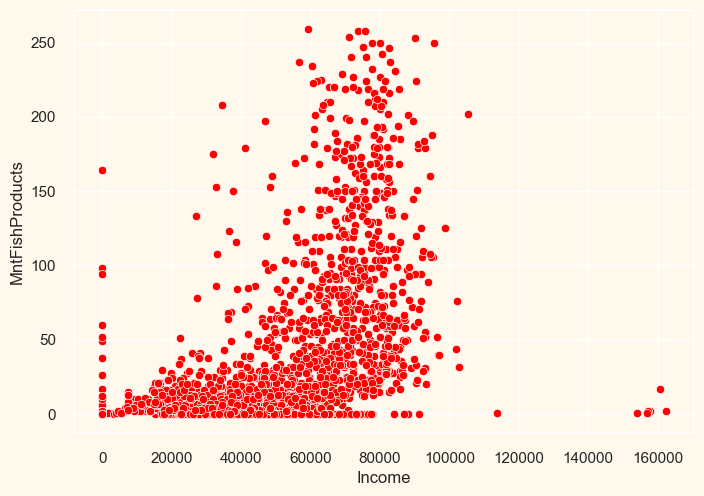

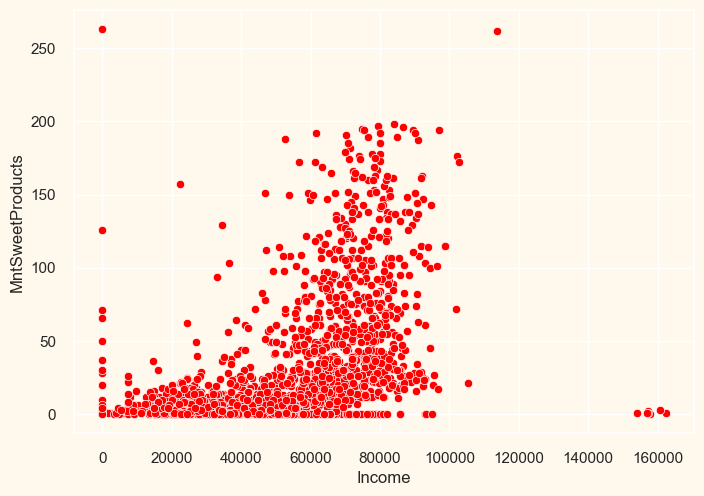

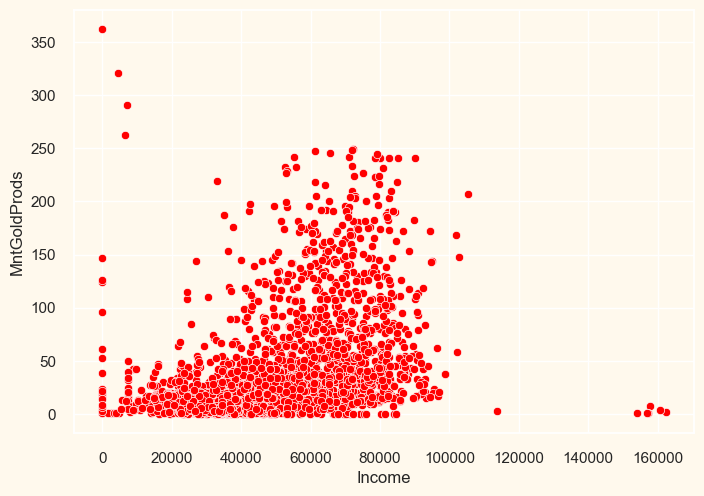

In [365]:
for prod in products:
    sns.scatterplot(x='Income', y=prod, data=marketing, color='red')
    plt.show()

In [366]:
#inference with more income(buying power) people tend to buy products for huge amount

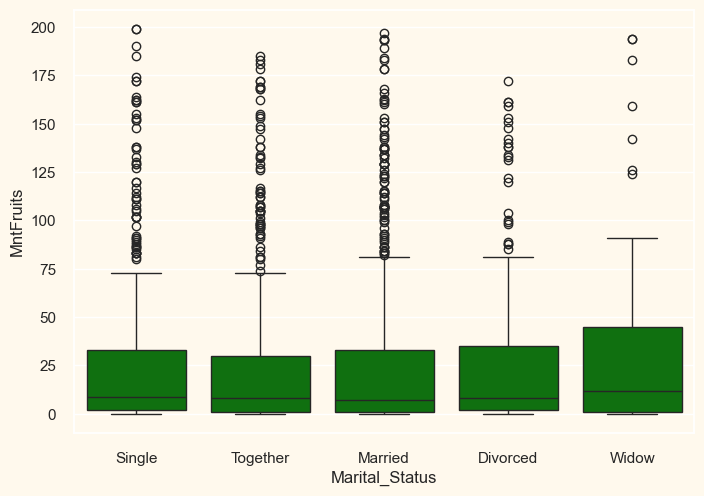

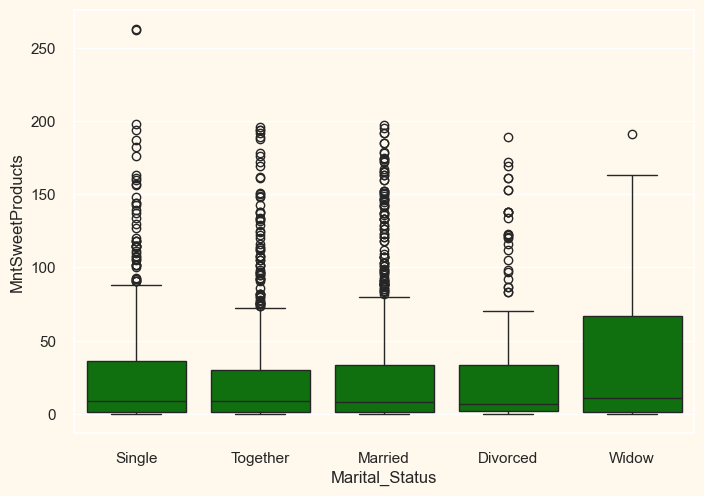

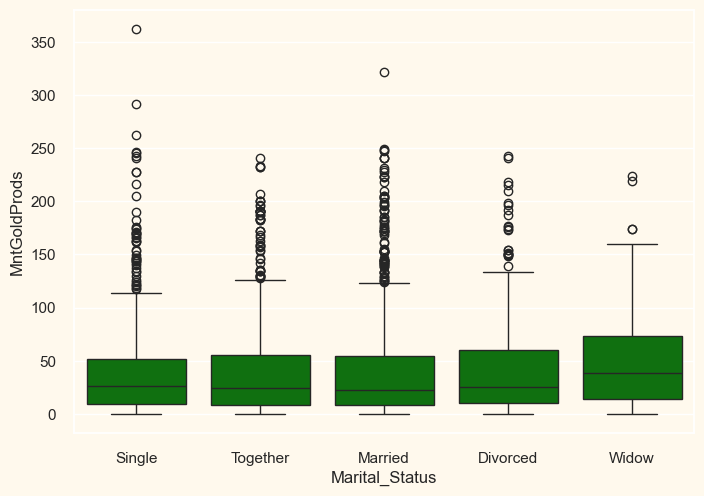

In [367]:
for prod in products:
    sns.boxplot(x='Marital_Status', y=prod, data=marketing, color='green')
    plt.show()

In [368]:
#widows are old,aged they have more money,so they buy more compared to ppl who have life commitements
#(single need money for life,marriage needs money money for kids..so on)

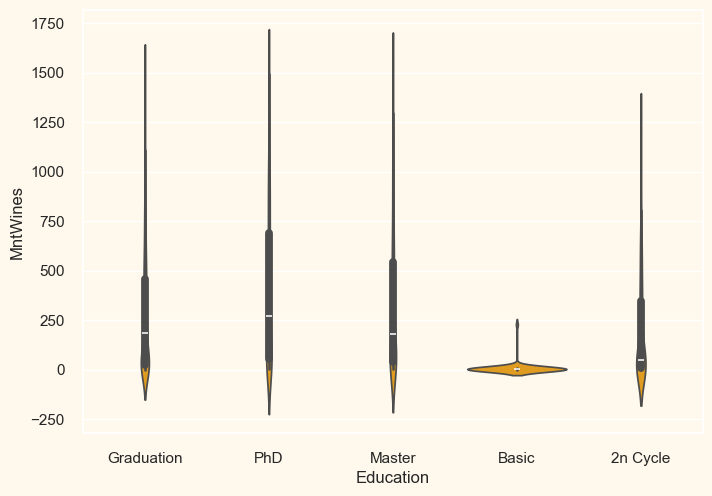

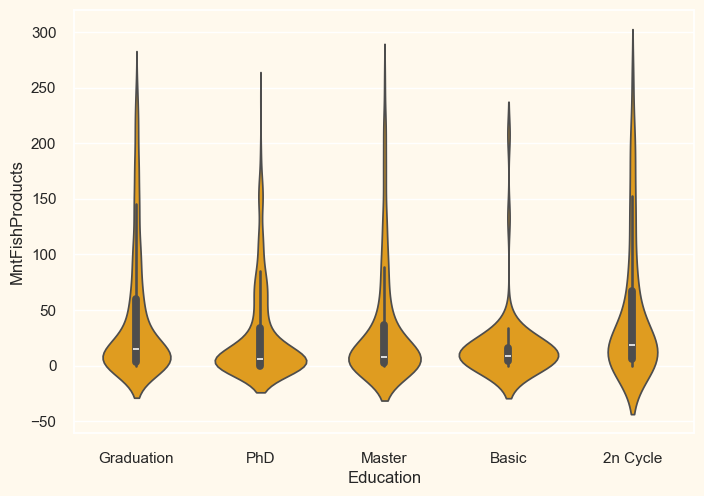

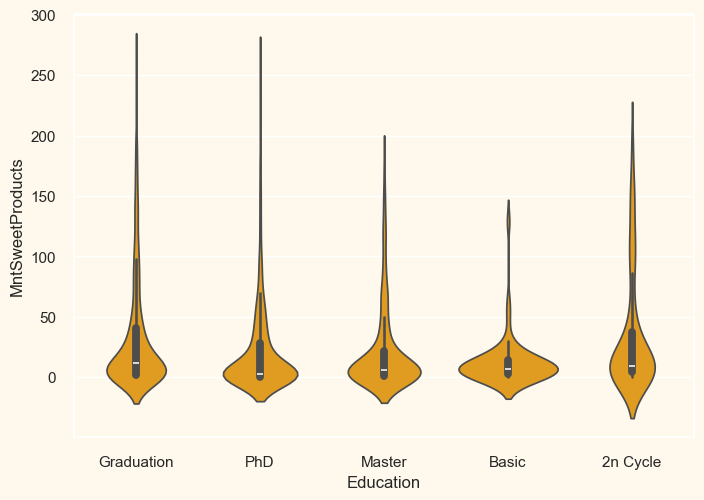

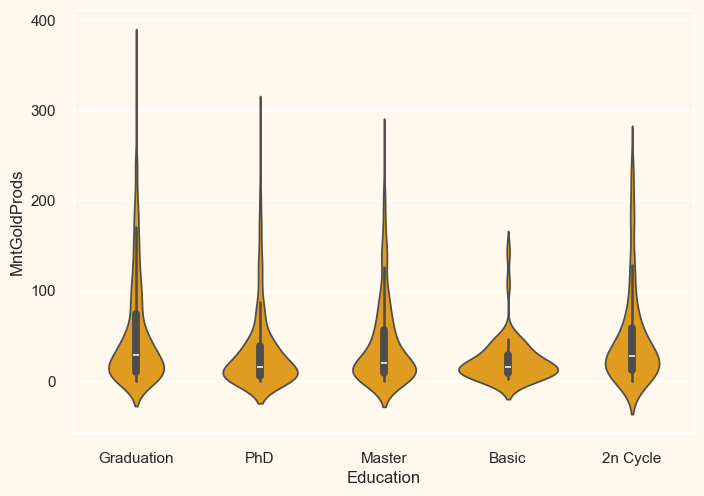

In [369]:
for prod in products:
    sns.violinplot(x='Education', y=prod, data=marketing, color='orange')
    plt.show()

In [370]:
#those who did basic education dont have more buying power
#phd,master have high buying range
#graduate buys more gold product

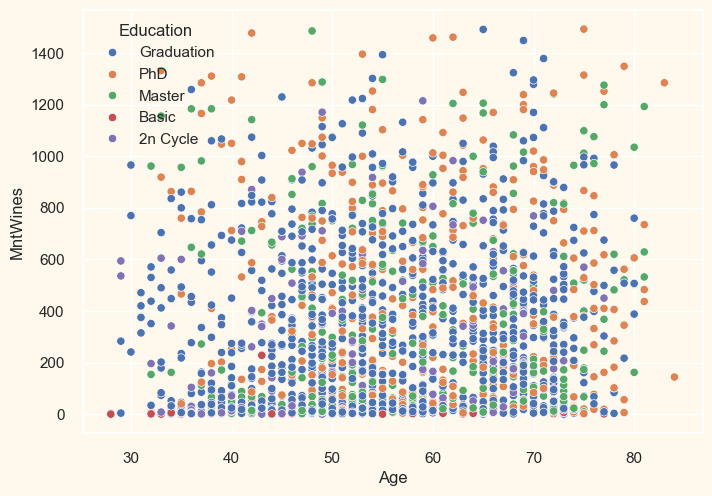

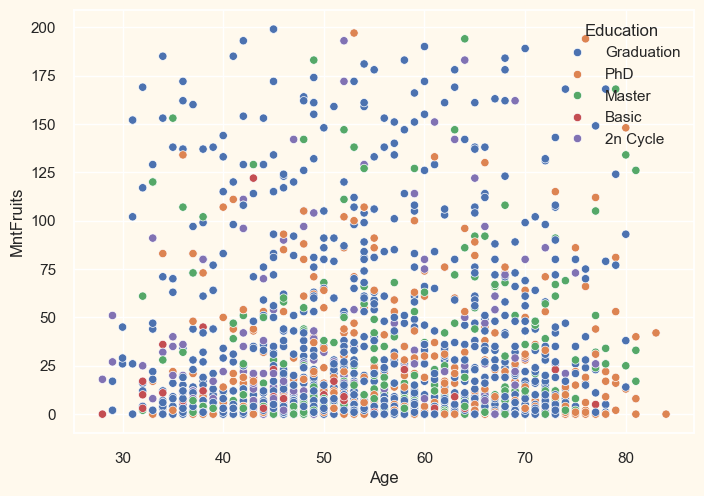

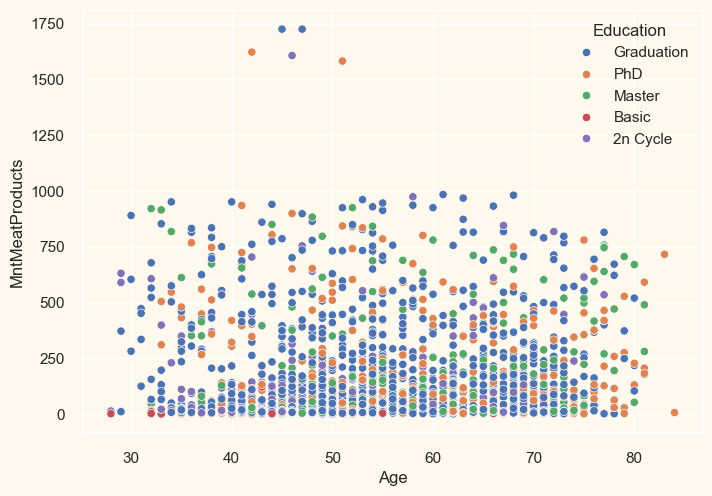

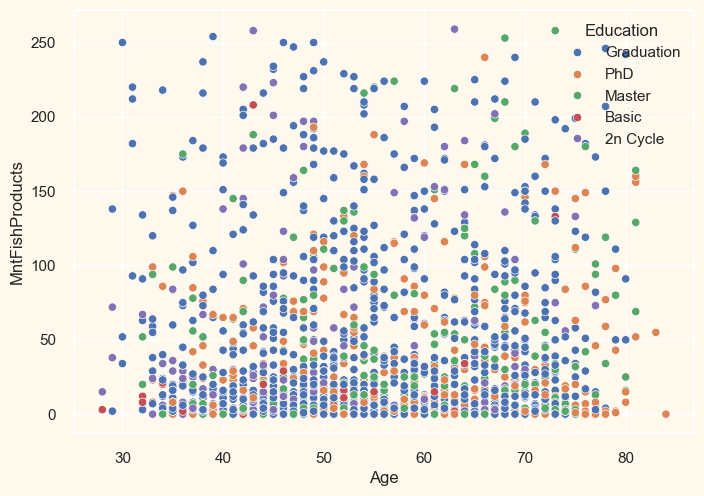

In [371]:
for prod in products:
    sns.scatterplot(x='Age', y=prod, hue='Education',data=marketing,)
    plt.show()

In [372]:
#respective of wht thier education is , everyone(all ages) are trying to buy goods more in number that has less price.

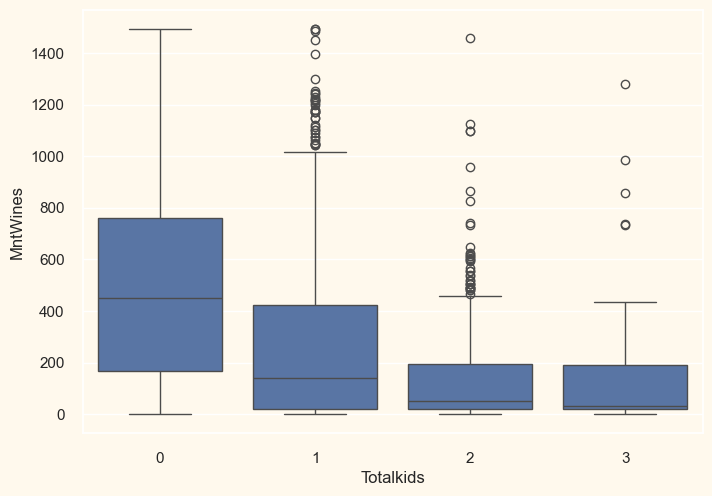

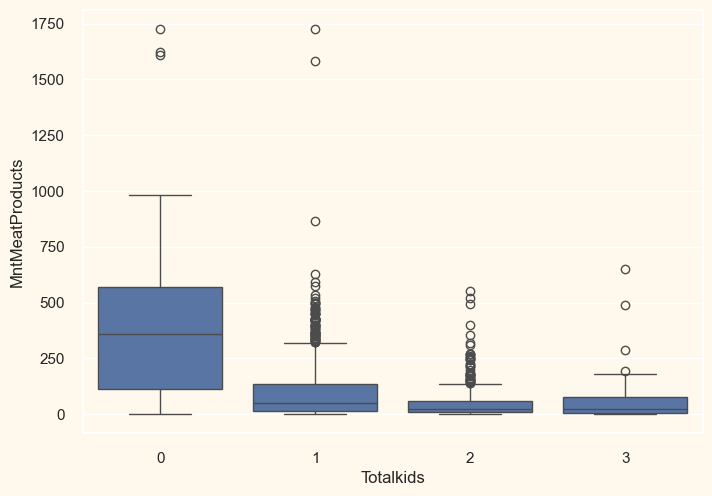

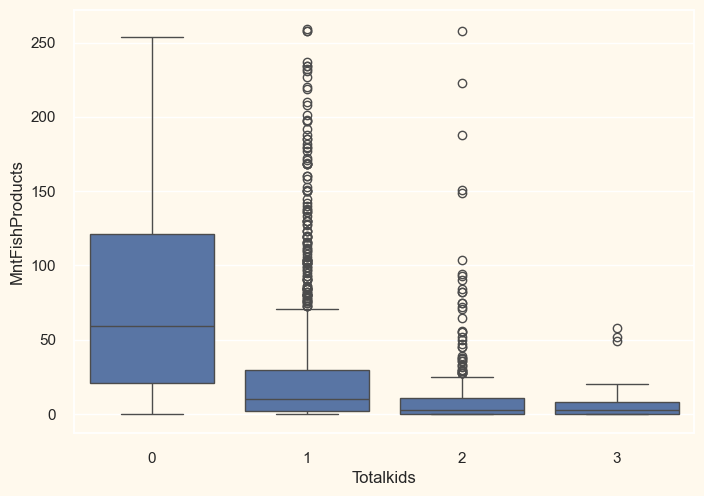

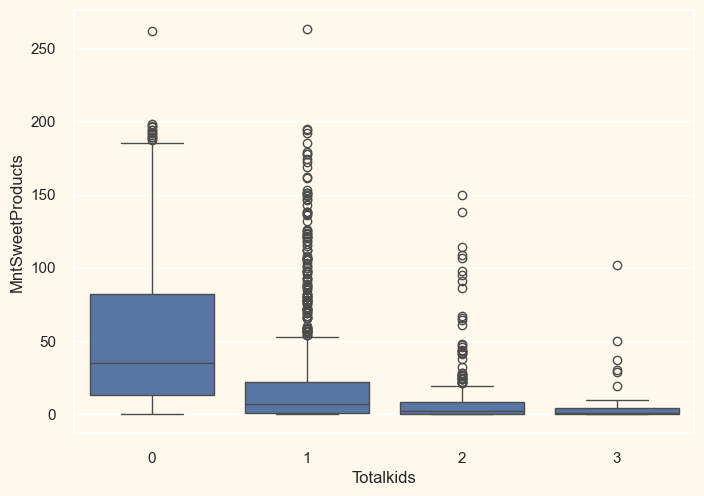

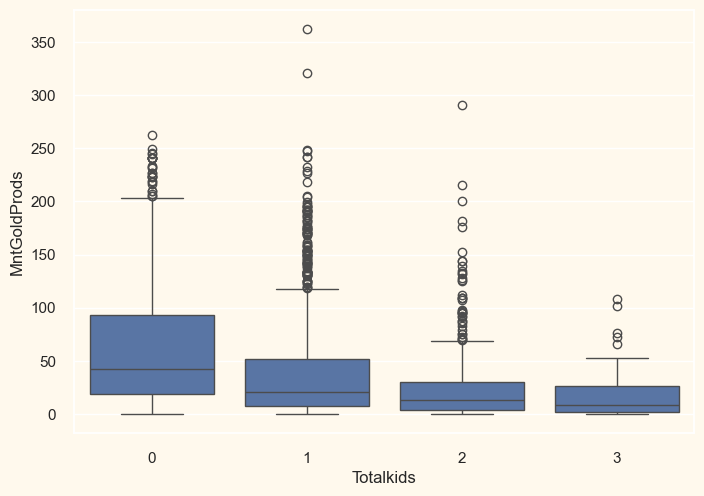

In [373]:
for prod in products:
    sns.boxplot(x='Totalkids', y=prod,data=marketing,)
    plt.show()

In [374]:
#those who have zero kids are rich and those who have 3 are poor

In [375]:
cmp1_count = ((marketing['AcceptedCmp1'] == 1).sum())/len(marketing['AcceptedCmp1'])
print(cmp1_count*100)
cmp2_count = ((marketing['AcceptedCmp2'] == 1).sum())/len(marketing['AcceptedCmp2'])
print(cmp2_count*100)
cmp3_count = ((marketing['AcceptedCmp3'] == 1).sum())/len(marketing['AcceptedCmp3'])
print(cmp3_count*100)
cmp4_count = ((marketing['AcceptedCmp4'] == 1).sum())/len(marketing['AcceptedCmp4'])
print(cmp4_count*100)
cmp5_count = ((marketing['AcceptedCmp5'] == 1).sum())/len(marketing['AcceptedCmp5'])
print(cmp5_count*100)
last_count = ((marketing['Response'] == 1).sum())/len(marketing['Response'])
print(last_count*100)
#the last response /campaign made people buy more..

6.440071556350627
1.3416815742397137
7.289803220035779
7.468694096601074
7.2450805008944545
14.937388193202148


In [376]:
totalwebpurchase=marketing['NumWebPurchases'].sum()
print('total web purchase:',totalwebpurchase)
totalwebvisit=marketing['NumWebVisitsMonth'].sum()
print('total web visit:',totalwebvisit)
print('Percent web visit to purchase:' ,(totalwebpurchase/totalwebvisit)*100)

total web purchase: 9140
total web visit: 11893
Percent web visit to purchase: 76.85192970655007


In [377]:
marketing['NumDealsPurchases'].sum()

5201

In [378]:
marketing['NumCatalogPurchases'].sum()

5955

In [379]:
marketing['NumStorePurchases'].sum()

12959

In [380]:
#store purchase is the highest ,next is web purchase

## Feature Engg

In [381]:
marketing.head()

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0        1957  Graduation         Single   58138        0         0   
1        1954  Graduation         Single   46344        1         1   
2        1965  Graduation       Together   71613        0         0   
3        1984  Graduation       Together   26646        1         0   
4        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635         88  ...             0             0   
1  2014-03-08       38        11          1  ...             0             0   
2  2013-08-21       26       426         49  ...             0             0   
3  2014-02-10       26        11          4  ...             0             0   
4  2014-01-19       94       173         43  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0             0             0             0         0         1   67   
1             0             0             0         0         0   70   
2             0             0             0         0         0   59   
3             0             0             0         0         0   40   
4             0             0             0         0         0   43   

   age_enrolled  Totalkids  
0            55          0  
1            60          2  
2            48          0  
3            30          1  
4            33          1  

[5 rows x 29 columns]

In [382]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
marketing['Education'] = encoder.fit_transform(marketing['Education'])
marketing['Marital_Status'] = encoder.fit_transform(marketing['Marital_Status'])

In [383]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler()
marketing['NumDealsPurchases']=mmscaler.fit_transform(marketing[['NumDealsPurchases']])
marketing['NumWebPurchases']=mmscaler.fit_transform(marketing[['NumWebPurchases']])
marketing['NumCatalogPurchases']=mmscaler.fit_transform(marketing[['NumCatalogPurchases']])
marketing['NumStorePurchases']=mmscaler.fit_transform(marketing[['NumStorePurchases']])   
marketing['NumWebVisitsMonth']=mmscaler.fit_transform(marketing[['NumWebVisitsMonth']])

In [384]:
marketing.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'age_enrolled',
       'Totalkids'],
      dtype='object')

In [385]:
marketing.drop(columns=['Kidhome',
       'Teenhome', 'Dt_Customer'],inplace=True)

In [386]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2236 non-null   int64  
 1   Education            2236 non-null   int32  
 2   Marital_Status       2236 non-null   int32  
 3   Income               2236 non-null   int64  
 4   Recency              2236 non-null   int64  
 5   MntWines             2236 non-null   int64  
 6   MntFruits            2236 non-null   int64  
 7   MntMeatProducts      2236 non-null   int64  
 8   MntFishProducts      2236 non-null   int64  
 9   MntSweetProducts     2236 non-null   int64  
 10  MntGoldProds         2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   float64
 12  NumWebPurchases      2236 non-null   float64
 13  NumCatalogPurchases  2236 non-null   float64
 14  NumStorePurchases    2236 non-null   float64
 15  NumWebVisitsMonth    2236 non-null   float6

In [387]:
marketing.drop(columns=['Year_Birth'],inplace=True)

In [388]:
marketing.head()

Education  Marital_Status  Income  Recency  MntWines  MntFruits  \
0          2               2   58138       58       635         88   
1          2               2   46344       38        11          1   
2          2               3   71613       26       426         49   
3          2               3   26646       26        11          4   
4          4               1   58293       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0              546              172                88            88  ...   
1                6                2                 1             6  ...   
2              127              111                21            42  ...   
3               20               10                 3             5  ...   
4              118               46                27            15  ...   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  Age  age_enrolled  Totalkids  
0         0         1   67            55          0  
1         0         0   70            60          2  
2         0         0   59            48          0  
3         0         0   40            30          1  
4         0         0   43            33          1  

[5 rows x 25 columns]

In [389]:
marketing["Spent"] = marketing["MntWines"]+ marketing["MntFruits"]+ marketing["MntMeatProducts"]+ marketing["MntFishProducts"]+ marketing["MntSweetProducts"]+ marketing["MntGoldProds"]

In [390]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_marketing= scaler.fit(marketing)
scaled_marketing=pd.DataFrame(scaler.transform(marketing),columns=marketing.columns)
scaled_marketing.head()



Education  Marital_Status    Income   Recency  MntWines  MntFruits  \
0  -0.352133        0.250425  0.305306  0.306856  0.983228   1.554170   
1  -0.352133        0.250425 -0.229181 -0.383971 -0.871064  -0.636431   
2  -0.352133        1.193103  0.915974 -0.798467  0.362159   0.572177   
3  -0.352133        1.193103 -1.121867 -0.798467 -0.871064  -0.560893   
4   1.429245       -0.692252  0.312331  1.550344 -0.389661   0.421101   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0         1.679746         2.461068          1.475396      0.845669  ...   
1        -0.713455        -0.650414         -0.631638     -0.729742  ...   
2        -0.177201         1.344595         -0.147262     -0.038098  ...   
3        -0.651409        -0.503991         -0.583200     -0.748954  ...   
4        -0.217088         0.154911         -0.001950     -0.556831  ...   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001  2.386338   
1     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   
2     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   
3     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   
4     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   

        Age  age_enrolled  Totalkids     Spent  
0  1.016868      0.926098  -1.264308  1.680176  
1  1.273264      1.352074   1.395139 -0.962202  
2  0.333146      0.329731  -1.264308  0.282541  
3 -1.290693     -1.203782   0.065416 -0.918994  
4 -1.034298     -0.948197   0.065416 -0.305762  

[5 rows x 26 columns]

## Dimension reducation using PCA

In [391]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_marketing)
PCA_ds = pd.DataFrame(pca.transform(scaled_marketing), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2236.0 -1.906644e-17  2.737102 -5.165972 -2.444855 -0.866806  2.209569   
col2  2236.0  3.336627e-17  1.515275 -4.127521 -1.103476  0.025958  1.119993   
col3  2236.0  2.542192e-17  1.387040 -3.371327 -0.682512 -0.135316  0.336922   

           max  
col1  8.374324  
col2  4.702825  
col3  8.352227

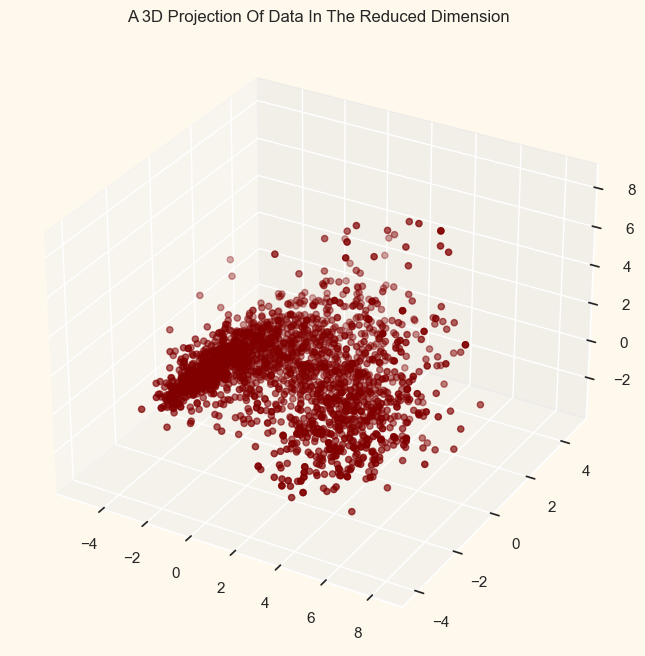

In [392]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


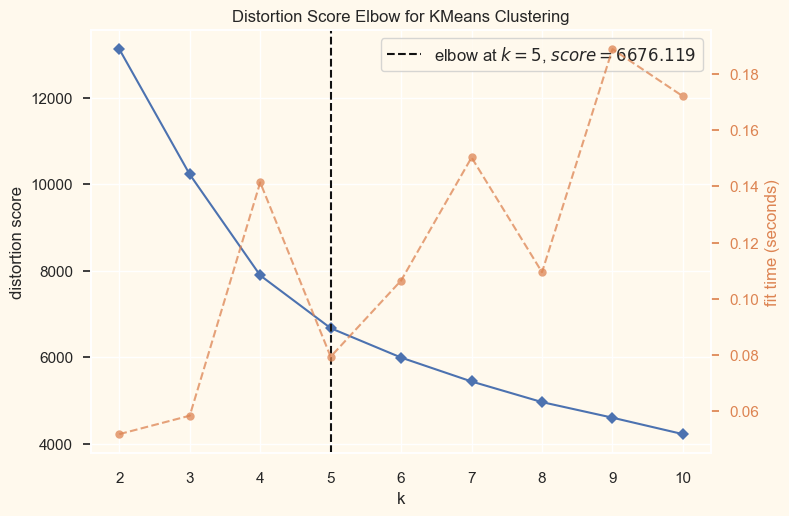

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [393]:
print('Elbow Method to determine the number of clusters to be formed:')
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [394]:
## The elbow method tells the correct no of clusters is 4

In [395]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [396]:
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=4, random_state=42),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=4),
}

In [397]:
for name, algorithm in clustering_algorithms.items():
    labels = algorithm.fit_predict(PCA_ds)
    PCA_ds["Clusters"] = labels
    marketing["Clusters"]=labels
    

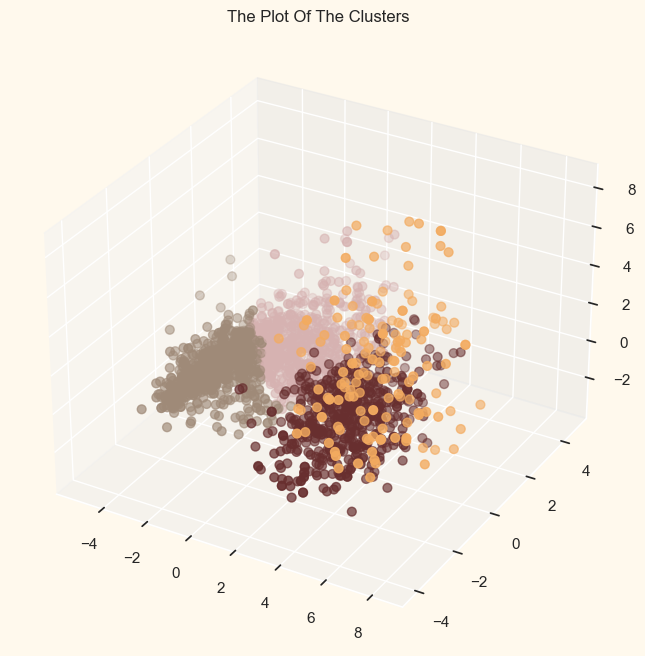

In [398]:
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig=plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

## Evaluating the model performance

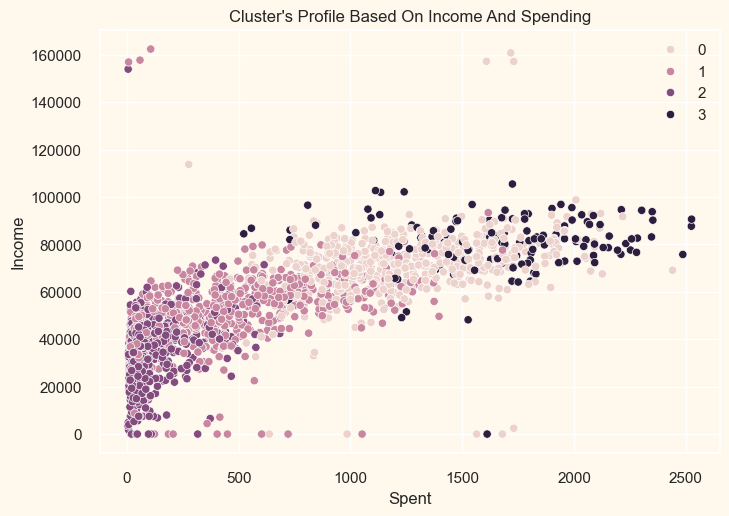

In [399]:
pl = sns.scatterplot(data = marketing,x=marketing["Spent"], y=marketing["Income"],hue=marketing["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
# 0 - avg income and high spend
# 1- lowmoderate income and high spend
# 2-low income and low spend
# 3 - very high income and very high spend